In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from PIL import Image

In [2]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_CHANNELS = 3
IMAGE_SIZE = (IMG_HEIGHT, IMG_WIDTH)
BATCH_SIZE = 16
EPOCHS = 20

In [3]:
DATA_DIR = Path("../brain_tumor_dataset")

In [4]:
def build_model():
    model = models.Sequential()

    # Input layer
    model.add(layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)))

    # Rescale pixel values from [0, 255] to [0, 1]
    model.add(layers.Rescaling(1./255))

    # Convolutional Block 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Block 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Block 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))

    # Add Dropout for regularization (helps fight overfitting)
    model.add(layers.Dropout(0.5))

    # Output layer (1 neuron with sigmoid for binary classification)
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss=BinaryCrossentropy(),
        metrics=['accuracy']
    )

    return model

In [5]:
def plot_history(history):
    """
    Plots the training and validation accuracy/loss over epochs.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Save and show the plot
    plt.savefig('training_history.png')
    print("\nTraining history plot saved as 'training_history.png'")
    # plt.show() # Uncomment this if you want the plot to pop up

Loading training data...
Found 203 images belonging to 2 classes.
Loading validation data...
Found 50 images belonging to 2 classes.
Found 203 training images belonging to 2 classes.
Found 50 validation images.
Class indices: {'no': 0, 'yes': 1}


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,287,809 (16.36 MB)

 Trainable params: 4,287,809 (16.36 MB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.6257 - loss: 0.6983 - val_accuracy: 0.6458 - val_loss: 0.5989
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6250 - loss: 0.6093 - val_accuracy: 0.6250 - val_loss: 0.6071
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.6310 - loss: 0.6440 - val_accuracy: 0.6250 - val_loss: 0.5815
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4375 - loss: 0.7569 - val_accuracy: 0.6250 - val_loss: 0.5839
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.6203 - loss: 0.6299 - val_accuracy: 0.7083 - val_loss: 0.5389
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6250 - loss: 0.6910 - val_accuracy: 0.6875 - val_loss: 0.5516
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.6364 - loss: 0.6353 - val_accuracy: 0.7083 - val_loss: 0.5353
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7500 - loss: 0

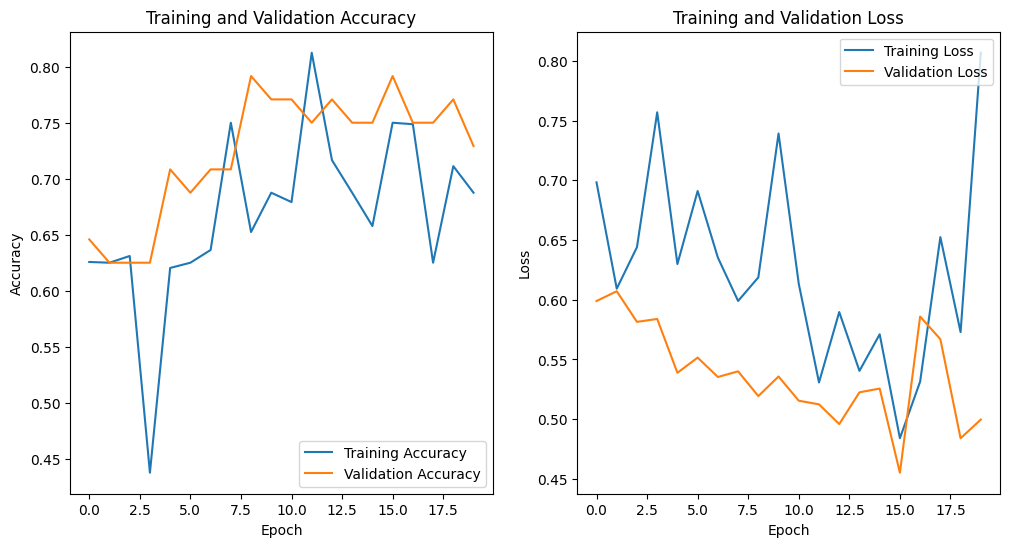

In [8]:
def main():
    # 1. Set up Data Augmentation and Generators
    # This is the key to working with small datasets!
    train_datagen = ImageDataGenerator(
        # Rescaling is done in the model, but we can do it here too
        # rescale=1./255,
        validation_split=0.2,  # Use 20% of the data for validation

        # --- Augmentation Parameters ---
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Note: Validation data should NOT be augmented
    validation_datagen = ImageDataGenerator(
        # rescale=1./255,
        validation_split=0.2 # Must be the same split
    )

    # 3. Load data from directories
    print("Loading training data...")
    train_generator = train_datagen.flow_from_directory(
        DATA_DIR,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',  # For binary classification (tumor vs. no_tumor)
        subset='training',    # Specify this is the training subset
        color_mode='rgb'      # 'rgb' even if images are grayscale, for 3 channels
    )

    print("Loading validation data...")
    validation_generator = validation_datagen.flow_from_directory(
        DATA_DIR,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='validation',  # Specify this is the validation subset
        color_mode='rgb'
    )

    # Check if data was loaded
    if train_generator.n == 0:
        print(f"No training images found in {DATA_DIR}.")
        print("Please check your DATA_DIR path and directory structure.")
        return
    if validation_generator.n == 0:
        print(f"No validation images found. Not enough images in {DATA_DIR} to create a validation split.")
        # We can continue without validation, but it's not recommended
        # For this example, we'll stop if validation is 0
        return


    print(f"Found {train_generator.n} training images belonging to {train_generator.num_classes} classes.")
    print(f"Found {validation_generator.n} validation images.")
    print(f"Class indices: {train_generator.class_indices}")

    # 4. Build the model
    model = build_model()
    model.summary()

    # 5. Train the model
    print("\nStarting model training...")
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.n // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.n // BATCH_SIZE
    )
    print("Model training finished.")
    model.save("Brain_Tumor_Classifier_Model.keras")

    # 6. Plot results
    plot_history(history)

if __name__ == "__main__":
    main()